# Word Cloud

In [0]:
%sh

pip install wordcloud
pip install nltk
pip install spacy
pip install textblob
python -m spacy download en_core_web_lg
python -m spacy download en_core_web_sm
python -m spacy download en

Requirement already satisfied: wordcloud in /databricks/python3/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: pillow in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (8.4.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.5)
Requirement already satisfied: regex>=2021.8.3 in /databricks/python3/lib/python3.8/site-packages (from nltk) (2021.11.2)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk) (4.62.3)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (8.0.3)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: spacy in /databricks/python3/lib/python3.8/site-packages (3.2.0)
Requirement already satisfied: jinja2 in /databricks/python3/lib/python3.8/site-packages (from spacy) (3.0.2)
Requirement already satisfied: thinc<8.1.0,>=8.0.12 in /databricks/python3/lib/python3.8/site-packages (from spacy) (8.0.13)
Requirement already satisfied: pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4 in /databricks/python3/lib/python3.8/site-packages (from spacy) (1.8.2)
Requirement already satisfied: setuptools in /databricks/python3/lib/python3.8/site-packages (from spacy) (50.3.1)
Requirement already satisfied: pathy>=0.3.5 in /databricks/python3/lib/python3.8/site-packages (from spacy) (0.6.1)
Requirement already satisfied: blis<0.8.0,>=0.4.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (0.7.5)
Requirement already satisfied: numpy>=1.15.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (1.19.2)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from spacy) (2.0.6)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (1.0.6)
Requirement already satisfied: wasabi<1.1.0,>=0.8.1 in /databricks/python3/lib/python3.8/site-packages (from spacy) (0.8.2)
Requirement already satisfied: typer<0.5.0,>=0.3.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (0.4.0)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (2.24.0)
Requirement already satisfied: langcodes<4.0.0,>=3.2.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (3.2.1)
Requirement already satisfied: catalogue<2.1.0,>=2.0.6 in /databricks/python3/lib/python3.8/site-packages (from spacy) (2.0.6)
Requirement already satisfied: spacy-loggers<2.0.0,>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (1.0.1)
Requirement already satisfied: preshed<3.1.0,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from spacy) (3.0.6)
Requirement already satisfied: tqdm<5.0.0,>=4.38.0 in /databricks/python3/lib/python3.8/site-packages (from spacy) (4.62.3)
Requirement already satisfied: srsly<3.0.0,>=2.4.1 in /databricks/python3/lib/python3.8/site-packages 

In [0]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")

def generate_WordCloud(appointment_id):
  df = spark.sql("""select * from cyb.transcript_assemblyai where appointment_id=""" + str(appointment_id)).toPandas()
  comment_words = ''
  stopwords = set(STOPWORDS)
  stopwords.update({'yeah', 'oh'})

  stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
  stopwords = set(stopwords_list.decode().splitlines())  
  stopwords.update({'yeah', 'oh'})
  
  # iterate through the csv file
  for val in df.Patient:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

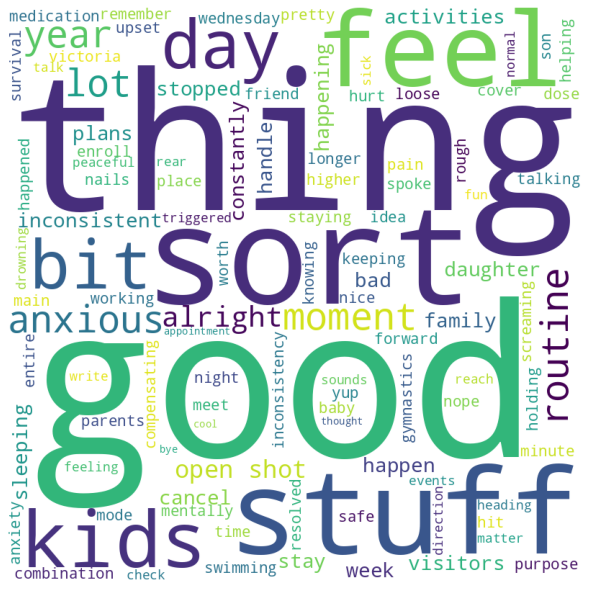

In [0]:
# Pass the appointment_id to generate its word cloud
generate_WordCloud(127998346)

### Word cloud for Emotional Words

In [0]:
# Emotions list
emotions_list = ['contempt', 'disgust', 'revulsion', 'envy', 'jealousy', 'exasperation', 'frustration', 'aggravation', 'agitation', 'annoyance', 'grouchiness', 'grumpiness', 'irritation', 'anger', 'bitterness', 'dislike', 'ferocity', 'fury', 'hate', 'hostility', 'loathing', 'outrage', 'rage', 'resentment', 'scorn', 'spite', 'vengefulness', 'wrath', 'torment', 'alarm', 'fear', 'fright', 'horror', 'hysteria', 'mortification', 'panic', 'shock', 'terror', 'anxiety', 'apprehension', 'distress', 'dread', 'nervousness', 'tenseness', 'uneasiness', 'worry', 'amusement', 'bliss', 'cheerfulness', 'delight', 'ecstasy', 'elation', 'enjoyment', 'euphoria', 'gaiety', 'gladness', 'glee', 'happiness', 'jolliness', 'joviality', 'joy', 'jubilation', 'satisfaction', 'contentment', 'pleasure', 'enthrallment', 'rapture', 'eagerness', 'hope', 'optimism', 'pride', 'triumph', 'relief', 'enthusiasm', 'excitement', 'exhilaration', 'thrill', 'zeal', 'zest', 'adoration', 'affection', 'attraction', 'caring', 'compassion', 'fondness', 'liking', 'love', 'sentimentality', 'tenderness', 'longing', 'arousal', 'desire', 'infatuation', 'lust', 'passion', 'disappointment', 'dismay', 'displeasure', 'alienation', 'defeat', 'dejection', 'embarrassment', 'homesickness', 'humiliation', 'insecurity', 'isolation', 'insult', 'loneliness', 'neglect', 'rejection', 'depression', 'despair', 'gloom', 'glumness', 'grief', 'hopelessness', 'melancholy', 'misery', 'sadness', 'sorrow', 'unhappiness', 'woe', 'guilt', 'regret', 'remorse', 'shame', 'agony', 'anguish', 'hurt', 'suffering', 'pity', 'sympathy', 'amazement', 'astonishment', 'surprise']
len(emotions_list)

Out[5]: 135

In [0]:
# Emotions Feelings list
emotions_feelings_list = ['contempt', 'disgust', 'revulsion', 'envy', 'jealousy', 'exasperation', 'frustration', 'aggravation', 'agitation', 'annoyance', 'grouchiness', 'grumpiness', 'irritation', 'anger', 'bitterness', 'dislike', 'ferocity', 'fury', 'hate', 'hostility', 'loathing', 'outrage', 'rage', 'resentment', 'scorn', 'spite', 'vengefulness', 'wrath', 'torment', 'alarm', 'fear', 'fright', 'horror', 'hysteria', 'mortification', 'panic', 'shock', 'terror', 'anxiety', 'apprehension', 'distress', 'dread', 'nervousness', 'tenseness', 'uneasiness', 'worry', 'amusement', 'bliss', 'cheerfulness', 'delight', 'ecstasy', 'elation', 'enjoyment', 'euphoria', 'gaiety', 'gladness', 'glee', 'happiness', 'jolliness', 'joviality', 'joy', 'jubilation', 'satisfaction', 'contentment', 'pleasure', 'enthrallment', 'rapture', 'eagerness', 'hope', 'optimism', 'pride', 'triumph', 'relief', 'enthusiasm', 'excitement', 'exhilaration', 'thrill', 'zeal', 'zest', 'adoration', 'affection', 'attraction', 'caring', 'compassion', 'fondness', 'liking', 'love', 'sentimentality', 'tenderness', 'longing', 'arousal', 'desire', 'infatuation', 'lust', 'passion', 'disappointment', 'dismay', 'displeasure', 'alienation', 'defeat', 'dejection', 'embarrassment', 'homesickness', 'humiliation', 'insecurity', 'isolation', 'insult', 'loneliness', 'neglect', 'rejection', 'depression', 'despair', 'gloom', 'glumness', 'grief', 'hopelessness', 'melancholy', 'misery', 'sadness', 'sorrow', 'unhappiness', 'woe', 'guilt', 'regret', 'remorse', 'shame', 'agony', 'anguish', 'hurt', 'suffering', 'pity', 'sympathy', 'amazement', 'astonishment', 'surprise', 'happy', 'afraid', 'sad', 'hot', 'amused', 'bored', 'anxious', 'confident', 'cold', 'suspicious', 'surprised', 'loving', 'curious', 'envious', 'jealous', 'miserable', 'confused', 'stupid', 'angry', 'sick', 'ashamed', 'withdrawn', 'indifferent', 'sorry', 'determined', 'crazy', 'bashful', 'depressed', 'enraged', 'frightened', 'interested', 'shy', 'hopeful', 'regretful', 'scared', 'stubborn', 'thirsty', 'guilty', 'nervous', 'embarrassed', 'disgusted', 'proud', 'ecstatic', 'lonely', 'frustrated', 'hurt', 'hungry', 'tired', 'smug', 'thoughtful', 'pained', 'optimistic', 'relieved', 'puzzled', 'shocked', 'joyful', 'sleepy', 'excited', 'skeptical', 'bad', 'worried', '', 'absorbed', 'beguiled', 'busy', 'charmed', 'cheered-up', 'convulsed', 'delighted', 'diverted', 'engaged', 'entertained', 'glad', 'interested', 'involved', 'pleased', 'preoccupied', 'regaled', 'wowed', 'beaming', 'blessed', 'blissful', 'carefree', 'cheerful', 'confident', 'content', 'delighted', 'euphoric', 'exhilarated', 'glad', 'glowing', 'gratified', 'inclined', 'joy', 'pleased', 'powerful', 'radiant', 'secure', 'self-accepting', 'strong', 'thrilled', 'amicable', 'anxiety-free', 'blissful', 'calm', 'committed', 'composed', 'content', 'cordial', 'flexible', 'harmonious', 'isolated', 'patient', 'pleasant', 'productive', 'quiet', 'relaxed', 'restful', 'secure', 'serene', 'soothed', 'stable', 'tranquil', 'undisturbed', 'untroubled', 'unworried', 'acceptable', 'amused', 'content', 'contented', 'delighted', 'elated', 'engaged', 'entertained', 'glad', 'good', 'grateful', 'gratified', 'happy', 'lovely', 'nice', 'overjoyed', 'pleasant', 'satisfied', 'self-approving', 'superior', 'thankful', 'thrilled', 'well-pleased', 'athletic', 'buff', 'compelling', 'controlling', 'dominant', 'dynamic', 'hard', 'herculean', 'high-powered', 'important', 'influential', 'intoxicating', 'irresistible', 'manly', 'mighty', 'persuasive', 'ripped', 'shredded', 'solid', 'spirituous', 'stiff', 'strong', 'sturdy', 'thunderous', 'tough', 'vigorous', 'well-built', 'affectionate', 'amorous', 'beautiful', 'charming', 'dreamy', 'erotic', 'fond', 'generous', 'grateful', 'humble', 'idealistic', 'illicit', 'intimate', 'kind', 'lovable', 'lovely', 'lovesick', 'loving', 'lustful', 'passionate', 'romanticist', 'satisfied', 'tolerant', 'annoyed', 'bad-tempered', 'conceited', 'crabby', 'cross', 'disgusted', 'displeased', 'dissatisfied', 'enraged', 'exasperated', 'fuming', 'furious', 'hot-tempered', 'hot-headed', 'intolerant', 'irritated', 'jealous', 'mad', 'outraged', 'provoked', 'raging', 'resentful', 'stingy', 'waspish', 'wrathful', 'bored feeling words:', 'bummer', 'disinterested', 'dull', 'fatigued', 'inattentive', 'flat', 'lifeless', 'monotonous', 'spiritless', 'stale', 'stodgy', 'stuffy', 'stupid', 'tamed', 'tedious', 'tired', 'tiresome', 'tiring', 'annoyed', 'appalled', 'dismayed', 'displeased', 'dissatisfied', 'embarrassed', 'grossed-out', 'horrified', 'nasty', 'nauseated', 'offended', 'outraged', 'repelled', 'repulsed', 'revolted', 'shocked', 'sickened', 'trashed', 'ugly', 'unwanted', 'used', 'violated', 'anxious', 'apprehensive', 'diffident', 'doubtful', 'fearful', 'hesitant', 'inhibited', 'introverted', 'passive', 'self-conscious', 'self-doubting', 'shy', 'timid', 'unassertive', 'uncertain', 'unconfident', 'unsure', 'worried', 'awful', 'blue', 'broken-hearted', 'depressed', 'doleful', 'down', 'downhearted', 'gloomy', 'glum', 'guilty', 'heartbroken', 'lonely', 'low-spirited', 'miserable', 'mournful', 'needy', 'pitiful', 'regretful', 'small', 'sorrowful', 'sorry', 'unfortunate', 'unhappy', 'afraid', 'agitated', 'alarmed', 'confused', 'fearful', 'frantic', 'frightened', 'horrified', 'hysterical', 'impatient', 'indecisive', 'intimidated', 'jittery', 'jumpy', 'nervous', 'panicky', 'petrified', 'rigid', 'shaky', 'spooked', 'stressed', 'terrified', 'worried']
len(emotions_feelings_list)

Out[6]: 464

In [0]:
# Emotions Feelings Set
emotions_feelings_set = {'', 'absorbed', 'acceptable', 'adoration', 'affection', 'affectionate', 'afraid', 'aggravation', 'agitated', 'agitation', 'agony', 'alarm', 'alarmed', 'alienation', 'amazement', 'amicable', 'amorous', 'amused', 'amusement', 'anger', 'angry', 'anguish', 'annoyance', 'annoyed', 'anxiety', 'anxiety-free', 'anxious', 'appalled', 'apprehension', 'apprehensive', 'arousal', 'ashamed', 'astonishment', 'athletic', 'attraction', 'awful', 'bad', 'bad-tempered', 'bashful', 'beaming', 'beautiful', 'beguiled', 'bitterness', 'blessed', 'bliss', 'blissful', 'blue', 'bored', 'bored feeling words:', 'broken-hearted', 'buff', 'bummer', 'busy', 'calm', 'carefree', 'caring', 'charmed', 'charming', 'cheered-up', 'cheerful', 'cheerfulness', 'cold', 'committed', 'compassion', 'compelling', 'composed', 'conceited', 'confident', 'confused', 'contempt', 'content', 'contented', 'contentment', 'controlling', 'convulsed', 'cordial', 'crabby', 'crazy', 'cross', 'curious', 'defeat', 'dejection', 'delight', 'delighted', 'depressed', 'depression', 'desire', 'despair', 'determined', 'diffident', 'disappointment', 'disgust', 'disgusted', 'disinterested', 'dislike', 'dismay', 'dismayed', 'displeased', 'displeasure', 'dissatisfied', 'distress', 'diverted', 'doleful', 'dominant', 'doubtful', 'down', 'downhearted', 'dread', 'dreamy', 'dull', 'dynamic', 'eagerness', 'ecstasy', 'ecstatic', 'elated', 'elation', 'embarrassed', 'embarrassment', 'engaged', 'enjoyment', 'enraged', 'entertained', 'enthrallment', 'enthusiasm', 'envious', 'envy', 'erotic', 'euphoria', 'euphoric', 'exasperated', 'exasperation', 'excited', 'excitement', 'exhilarated', 'exhilaration', 'fatigued', 'fear', 'fearful', 'ferocity', 'flat', 'flexible', 'fond', 'fondness', 'frantic', 'fright', 'frightened', 'frustrated', 'frustration', 'fuming', 'furious', 'fury', 'gaiety', 'generous', 'glad', 'gladness', 'glee', 'gloom', 'gloomy', 'glowing', 'glum', 'glumness', 'good', 'grateful', 'gratified', 'grief', 'grossed-out', 'grouchiness', 'grumpiness', 'guilt', 'guilty', 'happiness', 'happy', 'hard', 'harmonious', 'hate', 'heartbroken', 'herculean', 'hesitant', 'high-powered', 'homesickness', 'hope', 'hopeful', 'hopelessness', 'horrified', 'horror', 'hostility', 'hot', 'hot-headed', 'hot-tempered', 'humble', 'humiliation', 'hungry', 'hurt', 'hysteria', 'hysterical', 'idealistic', 'illicit', 'impatient', 'important', 'inattentive', 'inclined', 'indecisive', 'indifferent', 'infatuation', 'influential', 'inhibited', 'insecurity', 'insult', 'interested', 'intimate', 'intimidated', 'intolerant', 'intoxicating', 'introverted', 'involved', 'irresistible', 'irritated', 'irritation', 'isolated', 'isolation', 'jealous', 'jealousy', 'jittery', 'jolliness', 'joviality', 'joy', 'joyful', 'jubilation', 'jumpy', 'kind', 'lifeless', 'liking', 'loathing', 'loneliness', 'lonely', 'longing', 'lovable', 'love', 'lovely', 'lovesick', 'loving', 'low-spirited', 'lust', 'lustful', 'mad', 'manly', 'melancholy', 'mighty', 'miserable', 'misery', 'monotonous', 'mortification', 'mournful', 'nasty', 'nauseated', 'needy', 'neglect', 'nervous', 'nervousness', 'nice', 'offended', 'optimism', 'optimistic', 'outrage', 'outraged', 'overjoyed', 'pained', 'panic', 'panicky', 'passion', 'passionate', 'passive', 'patient', 'persuasive', 'petrified', 'pitiful', 'pity', 'pleasant', 'pleased', 'pleasure', 'powerful', 'preoccupied', 'pride', 'productive', 'proud', 'provoked', 'puzzled', 'quiet', 'radiant', 'rage', 'raging', 'rapture', 'regaled', 'regret', 'regretful', 'rejection', 'relaxed', 'relief', 'relieved', 'remorse', 'repelled', 'repulsed', 'resentful', 'resentment', 'restful', 'revolted', 'revulsion', 'rigid', 'ripped', 'romanticist', 'sad', 'sadness', 'satisfaction', 'satisfied', 'scared', 'scorn', 'secure', 'self-accepting', 'self-approving', 'self-conscious', 'self-doubting', 'sentimentality', 'serene', 'shaky', 'shame', 'shock', 'shocked', 'shredded', 'shy', 'sick', 'sickened', 'skeptical', 'sleepy', 'small', 'smug', 'solid', 'soothed', 'sorrow', 'sorrowful', 'sorry', 'spiritless', 'spirituous', 'spite', 'spooked', 'stable', 'stale', 'stiff', 'stingy', 'stodgy', 'stressed', 'strong', 'stubborn', 'stuffy', 'stupid', 'sturdy', 'suffering', 'superior', 'surprise', 'surprised', 'suspicious', 'sympathy', 'tamed', 'tedious', 'tenderness', 'tenseness', 'terrified', 'terror', 'thankful', 'thirsty', 'thoughtful', 'thrill', 'thrilled', 'thunderous', 'timid', 'tired', 'tiresome', 'tiring', 'tolerant', 'torment', 'tough', 'tranquil', 'trashed', 'triumph', 'ugly', 'unassertive', 'uncertain', 'unconfident', 'undisturbed', 'uneasiness', 'unfortunate', 'unhappiness', 'unhappy', 'unsure', 'untroubled', 'unwanted', 'unworried', 'used', 'vengefulness', 'vigorous', 'violated', 'waspish', 'well-built', 'well-pleased', 'withdrawn', 'woe', 'worried', 'worry', 'wowed', 'wrath', 'wrathful', 'zeal', 'zest'}
len(emotions_feelings_set)

Out[7]: 412

In [0]:
efl = {'', 'absorb', 'acceptable', 'adoration', 'affection', 'affectionate', 'afraid', 'aggravation', 'agitate', 'agitation', 'agony', 'alarm', 'alienation', 'amazement', 'amicable', 'amorous', 'amuse', 'amusement', 'anger', 'angry', 'anguish', 'annoy', 'annoyance', 'anxiety', 'anxiety - free', 'anxious', 'appal', 'apprehension', 'apprehensive', 'arousal', 'ashame', 'astonishment', 'athletic', 'attraction', 'awful', 'bad', 'bad - temper', 'bashful', 'beam', 'beautiful', 'beguile', 'bitterness', 'bless', 'bliss', 'blissful', 'blue', 'bore', 'bored feeling word :', 'break - hearted', 'buff', 'bummer', 'busy', 'calm', 'care', 'carefree', 'charm', 'charming', 'cheer - up', 'cheerful', 'cheerfulness', 'cold', 'commit', 'compassion', 'compelling', 'compose', 'conceited', 'confident', 'confuse', 'contempt', 'content', 'contentment', 'control', 'convulse', 'cordial', 'crabby', 'crazy', 'cross', 'curious', 'defeat', 'dejection', 'delight', 'depress', 'depression', 'desire', 'despair', 'determine', 'diffident', 'disappointment', 'disgust', 'disgusted', 'disintereste', 'dislike', 'dismay', 'displease', 'displeasure', 'dissatisfied', 'distress', 'divert', 'doleful', 'dominant', 'doubtful', 'down', 'downhearte', 'dread', 'dreamy', 'dull', 'dynamic', 'eagerness', 'ecstasy', 'ecstatic', 'elated', 'elation', 'embarrassed', 'embarrassment', 'engage', 'enjoyment', 'enrage', 'entertain', 'enthrallment', 'enthusiasm', 'envious', 'envy', 'erotic', 'euphoria', 'euphoric', 'exasperate', 'exasperation', 'excited', 'excitement', 'exhilarate', 'exhilaration', 'fatigue', 'fear', 'fearful', 'ferocity', 'flat', 'flexible', 'fond', 'fondness', 'frantic', 'fright', 'frighten', 'frustrate', 'frustration', 'fume', 'furious', 'fury', 'gaiety', 'generous', 'glad', 'gladness', 'glee', 'gloom', 'gloomy', 'glow', 'glum', 'glumness', 'good', 'grateful', 'gratify', 'grief', 'gross - out', 'grouchiness', 'grumpiness', 'guilt', 'guilty', 'happiness', 'happy', 'hard', 'harmonious', 'hate', 'heartbroken', 'herculean', 'hesitant', 'high - powered', 'homesickness', 'hope', 'hopeful', 'hopelessness', 'horrify', 'horror', 'hostility', 'hot', 'hot - head', 'hot - temper', 'humble', 'humiliation', 'hungry', 'hurt', 'hysteria', 'hysterical', 'idealistic', 'illicit', 'impatient', 'important', 'inattentive', 'incline', 'indecisive', 'indifferent', 'infatuation', 'influential', 'inhibit', 'insecurity', 'insult', 'interested', 'intimate', 'intimidate', 'intolerant', 'intoxicate', 'introvert', 'involve', 'irresistible', 'irritated', 'irritation', 'isolate', 'isolation', 'jealous', 'jealousy', 'jittery', 'jolliness', 'joviality', 'joy', 'joyful', 'jubilation', 'jumpy', 'kind', 'lifeless', 'like', 'loathe', 'loneliness', 'lonely', 'long', 'lovable', 'love', 'lovely', 'lovesick', 'low - spirited', 'lust', 'lustful', 'mad', 'manly', 'melancholy', 'mighty', 'miserable', 'misery', 'monotonous', 'mortification', 'mournful', 'nasty', 'nauseate', 'needy', 'neglect', 'nervous', 'nervousness', 'nice', 'offend', 'optimism', 'optimistic', 'outrage', 'overjoy', 'pain', 'panic', 'panicky', 'passion', 'passionate', 'passive', 'patient', 'persuasive', 'petrify', 'pitiful', 'pity', 'pleasant', 'please', 'pleasure', 'powerful', 'preoccupy', 'pride', 'productive', 'proud', 'provoke', 'puzzle', 'quiet', 'radiant', 'rage', 'rapture', 'regale', 'regret', 'regretful', 'rejection', 'relax', 'relief', 'relieve', 'remorse', 'repel', 'repulse', 'resentful', 'resentment', 'restful', 'revolt', 'revulsion', 'rigid', 'rip', 'romanticist', 'sad', 'sadness', 'satisfaction', 'satisfied', 'scare', 'scorn', 'secure', 'self - accept', 'self - approve', 'self - conscious', 'self - doubt', 'sentimentality', 'serene', 'shaky', 'shame', 'shock', 'shred', 'shy', 'sick', 'sicken', 'skeptical', 'sleepy', 'small', 'smug', 'solid', 'soothe', 'sorrow', 'sorrowful', 'sorry', 'spiritless', 'spirituous', 'spite', 'spook', 'stable', 'stale', 'stiff', 'stingy', 'stodgy', 'stress', 'strong', 'stubborn', 'stuffy', 'stupid', 'sturdy', 'suffer', 'superior', 'surprise', 'suspicious', 'sympathy', 'tame', 'tedious', 'tenderness', 'tenseness', 'terrify', 'terror', 'thankful', 'thirsty', 'thoughtful', 'thrill', 'thunderous', 'timid', 'tired', 'tiresome', 'tiring', 'tolerant', 'torment', 'tough', 'tranquil', 'trash', 'triumph', 'ugly', 'unassertive', 'uncertain', 'unconfident', 'undisturbed', 'uneasiness', 'unfortunate', 'unhappiness', 'unhappy', 'unsure', 'untroubled', 'unwanted', 'unworrie', 'use', 'vengefulness', 'vigorous', 'violate', 'waspish', 'well - build', 'well - pleased', 'withdraw', 'woe', 'worried', 'worry', 'wow', 'wrath', 'wrathful', 'z', 'zeal'}
len(efl)

Out[8]: 402

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!
Out[9]: True

In [0]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

def generate_Emotional_WordCloud(appointment_id):
  df = spark.sql("""select * from cyb.transcript_assemblyai where appointment_id=""" + str(appointment_id)).toPandas()
  comment_words = ''
  #stopwords = set(STOPWORDS)
  #stopwords.update({'yeah', 'oh'})

  #stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
  #stopwords = set(stopwords_list.decode().splitlines())  
  #stopwords.update({'yeah', 'oh'})
  
  # iterate through the csv file
  for val in df.Patient:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      #list of emotional words to be picked
      emo_list = []

      # Converts each token into lowercase
      for i in range(len(tokens)):
        if ((" ".join([token.lemma_ for token in nlp(tokens[i].lower())])) in efl):
          emo_list.append(tokens[i])
          #tokens[i] = tokens[i].lower()

      comment_words += " ".join(emo_list)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

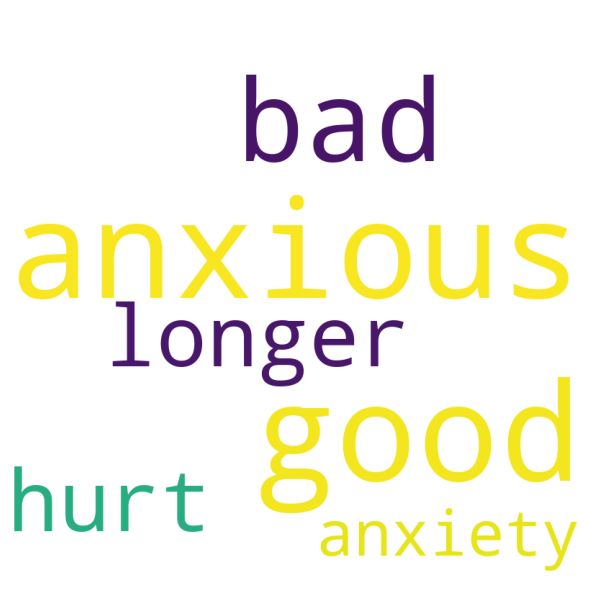

In [0]:
# Pass the appointment_id to generate its word cloud
generate_Emotional_WordCloud(127998346)

# Sentiment Analysis

In [0]:
%sh
pip install text2emotion

Collecting text2emotion
 Downloading text2emotion-0.0.5-py3-none-any.whl (57 kB)
Collecting emoji>=0.6.0
 Downloading emoji-1.6.1.tar.gz (170 kB)
 Preparing metadata (setup.py): started
 Preparing metadata (setup.py): finished with status 'done'
Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (from text2emotion) (3.6.5)
Requirement already satisfied: regex>=2021.8.3 in /databricks/python3/lib/python3.8/site-packages (from nltk->text2emotion) (2021.11.2)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk->text2emotion) (8.0.3)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk->text2emotion) (0.17.0)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk->text2emotion) (4.62.3)
Building wheels for collected packages: emoji
 Building wheel for emoji (setup.py): started
 Building wheel for emoji (setup.py): finished with status 'done'
 Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169295 sha256=8b9f23279d0948fc93b14b55b28d64137e15fb0f10393fd9c325adfe38951c2b
 Stored in directory: /root/.cache/pip/wheels/04/29/50/1e7189f03d2cf139e469863d54a1d3eabeb10c92c84e51f8a1
Successfully built emoji
Installing collected packages: emoji, text2emotion
Successfully installed emoji-1.6.1 text2emotion-0.0.5

In [0]:
from textblob import TextBlob
import text2emotion as te
import pandas as pd

def check_sentiments(appointment_id):
  df = spark.sql("""select patient_id, Patient from cyb.transcript_main where appointment_id=""" + str(appointment_id)).toPandas()
  feedbacks = df["Patient"].tolist()
  df_fl = spark.sql("""select * from cyb.silver_data where appointment_id=""" + str(appointment_id)).toPandas()
  dict_ses = {}
  displayHTML('<h2>Appointment_id: '+ str(appointment_id) + '<br>Patient_id: ' + str(df_fl['patient_id'][0]) + '</br></h2')
  display(df_fl[['confidence_performance', 'empathy_performance', 'goals_performance', 'family_wellbeing', 'personal_wellbeing', 'social_wellbeing', 'work_wellbeing']])
  str1 = " "
  str1 = str1.join(feedbacks)
  dict_ses.update(te.get_emotion(str1))
  polarity_ses = TextBlob(str1).sentiment.polarity
  #dict_ses['polarity_ses']=polarity_ses
  if (polarity_ses > 0):
    dict_ses['Sentiment']='Positive'
  elif (polarity_ses == 0):
    dict_ses['Sentiment']='Neutral'
  else:
    dict_ses['Sentiment']='Negative'

  positive_feedbacks = []
  negative_feedbacks = []
  neutral_feedbacks = []
  result_list = []

  for feedback in feedbacks:
    dict_ele = {}
    dict_ele['Patient'] = feedback
    dict_ele.update(te.get_emotion(feedback))
    feedback_polarity = TextBlob(feedback).sentiment.polarity
    #dict_ele['feedback_polarity']=feedback_polarity
    if (feedback_polarity > 0):
      positive_feedbacks.append(feedback)
      dict_ele['Sentiment']='Positive'
    elif (feedback_polarity == 0):
      neutral_feedbacks.append(feedback)
      dict_ele['Sentiment']='Neutral'
    else:
      negative_feedbacks.append(feedback)
      dict_ele['Sentiment']='Negative'
    result_list.append(dict_ele)

  dict_ses['Total_Turn_Count']=len(feedbacks)
  dict_ses['Positive_Turn_Count']=len(positive_feedbacks)
  dict_ses['Negative_Turn_Count']=len(negative_feedbacks)
  dict_ses['Neutral_Turn_Count']=len(neutral_feedbacks)
  displayHTML('<h2>Emotion and Sentiment Detection (Session wise)</h2')
  display(pd.DataFrame(dict_ses, index=[0]))
  displayHTML('<h2>Emotion and Sentiment Detection (Turn wise)</h2')
  display(pd.DataFrame.from_dict(result_list))
  #print('Total Count:' + str(len(feedbacks)))
  #print('Positive_feebacks Count : {}'.format(len(positive_feedbacks)))
  #print(positive_feedbacks)
  #print('Negative_feedback Count : {}'.format(len(negative_feedbacks)))
  #print(negative_feedbacks)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!

In [0]:
# Pass the appointment_id as an argument to generate its sentimemt and emotions stats
check_sentiments(127998346)

Appointment_id: 127998346 Patient_id: 1279 </h2

confidence_performance,empathy_performance,goals_performance,family_wellbeing,personal_wellbeing,social_wellbeing,work_wellbeing
4,4,4,2,4,2,0


Emotion and Sentiment Detection (Session wise)</h2

Happy,Angry,Surprise,Sad,Fear,Sentiment,Total_Turn_Count,Positive_Turn_Count,Negative_Turn_Count,Neutral_Turn_Count
0.18,0.1,0.25,0.19,0.28,Positive,27,15,3,9


Emotion and Sentiment Detection (Turn wise)</h2

Patient,Happy,Angry,Surprise,Sad,Fear,Sentiment
Okay. Hello. Hi. How are you? Good. Who are you? Is show me. My nails are pretty nice. I.,1.0,0.0,0.0,0.0,0.0,Positive
"Okay, they're not.",0.0,0.0,0.0,0.0,0.0,Positive
No.,0.0,0.0,0.0,0.0,0.0,Neutral
"Yeah. Okay. I mean, they're working for the purpose that they're for, so I haven't been in pain. So that's the main thing.",0.0,0.0,0.33,0.0,0.67,Positive
"Not you find a little bit, but I think she's a bit rough. So I'm going to go somewhere else and try somewhere else because I've tried saying something, but I don't think she quite got it. Yeah, I was like, okay, well, yeah. So I spoke to a friend who gets that done, and she's like, it shouldn't hurt that much. Okay.",0.12,0.0,0.25,0.38,0.25,Positive
"Yeah, that's it.",0.0,0.0,0.0,0.0,0.0,Neutral
"Actually, like, just same old, same old. Yeah. It's the same stuff every day with little kids. Just. Yeah. And there's been nothing really that's happened or been going on. I mean, when all I have visitors here in Victoria. So.",0.33,0.17,0.33,0.0,0.17,Negative
Yeah. I'm not really seen anyone for anything to happen or for me to feel anxious or anything like that. So just being keeping to ourselves and trying to stay safe and. Yup. Yeah. Just compensating on the.,0.0,0.33,0.67,0.0,0.0,Positive
"I had my daughter in two last year before we got hit with cover here. And then they went back, and then they stopped, and then they went back, and then they stopped, and I don't want the inconsistency for her. She does swimming on a Wednesday, and that's already inconsistent enough because we open shot, open shot, open shot. So we are trying not to enroll her in too much until this sort of gets a bit of handle on it, whether that's a year or. I mean, she's not going to remember anyway, but. Yeah, because it's so inconsistent. And it's like, you don't know what you're doing one week to the next. You can't make any plans because then you look forward to the plans, and then last minute it's like, Nope. Everyone stay home. No one go near each other. So mentally, too, I'm just like, I would just rather know. Okay. This is what I'm doing. I'm staying home. We're doing activities here. When we can have visitors, we go and we meet them at a part or we go to my parents place or they come here. Yeah, we can do that stuff. We do that stuff. But with all the activities because we want to put our daughter into gymnastics and things like that, it's just not worth it at the moment until they sort all this stuff out. What else do you say? All this stuff.",0.0,0.27,0.07,0.17,0.5,Positive
Okay.,0.0,0.0,0.0,0.0,0.0,Positive
